<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Aguja_Bufon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

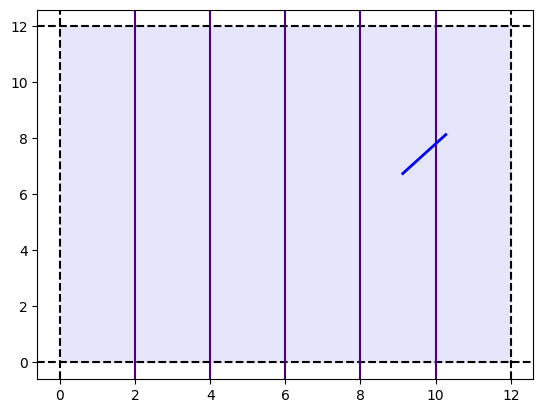

In [159]:
#MUESTRA DEL EXPERIMENTO
#-Graficar área
#---Crear lineas verticales
#------nlineas-> número de lineas verticales dentro del área
nlineas=5
#------d-> Distancia entre lineas
dis=2
#------b-> Tamaño de la base del área
b=(nlineas+1)*dis
#------h-> Tamaño de la altura del área  (Se tomara del mismo tamaño de la base para que sea un cuadrado)
h=b
#Contornos del área
plt.axvline(0,color="black",linestyle="--")
plt.axvline(12,color="black",linestyle="--")
plt.axhline(0,color="black",linestyle="--")
plt.axhline(12,color="black",linestyle="--")
x = [0,0,b,b]
y = [0,h,b,0]
plt.fill(x,y,color="lavender")
for i in range(1,nlineas+1):
  plt.axvline(i*dis,color="indigo")

#-Generar  1 aguja
#------k-> Tamaño de la aguja(k<=d)
k=1.8
#---Generamos xc y yc que son las coordenadas del centro de la aguja x[0,12] y y[0,12]
xc=b*rnd.random()
yc=h*rnd.random()
#---Generamos a-> Angulo de la aguja con la linea vertical a[0,90]=a[0,pi/2]
a=(math.pi/2)*rnd.random()
#---Generamos linea de aguja
x1=xc-(k/2)*math.sin(math.pi/2-a)
x2=xc+(k/2)*math.sin(math.pi/2-a)
y1=yc-(k/2)*math.cos(math.pi/2-a)
y2=yc+(k/2)*math.cos(math.pi/2-a)
xs=[x1,x2]
ys=[y1,y2]
plt.plot(xs,ys,"blue",linewidth=2)
plt.show()



Obtuvimos 15 éxitos
Y la siguiente representacion gráfica:


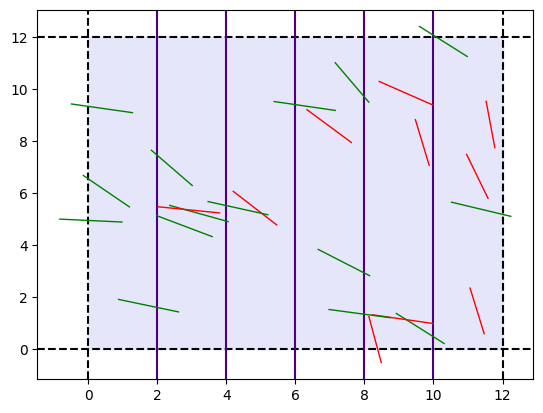

In [186]:
#Experimento con N intentos
N=25
#Contornos del área
plt.axvline(0,color="black",linestyle="--")
plt.axvline(12,color="black",linestyle="--")
plt.axhline(0,color="black",linestyle="--")
plt.axhline(12,color="black",linestyle="--")
x = [0,0,b,b]
y = [0,h,b,0]
plt.fill(x,y,color="lavender")
for i in range(1,nlineas+1):
  plt.axvline(i*dis,color="indigo")

#CICLO PARA REPETIR EL EXPERIMENTO N VECES
  # n -> NUMERO DE EXITOS
n=0
for i in range(N):
  #Generar 1 aguja
  xc=b*rnd.random()
  yc=h*rnd.random()
  a=(math.pi)*rnd.random()
  #L -> Distancia mas corta entre el centro de la aguja y las lineas verticales mas cercanas tanto por el lado derecho como del izquierdo
  if math.fmod(xc,2)>=1:
    L=2-math.fmod(xc,2)
  else:
    L=math.fmod(xc,2)
  if a<=(math.pi/2):
    x1=xc-(k/2)*math.sin(a)
    x2=xc+(k/2)*math.sin(a)
    y1=yc-(k/2)*(-math.cos(a))
    y2=yc+(k/2)*(-math.cos(a))
    dis_com=(k/2)*math.sin(a)
  else:
    x1=xc-(k/2)*math.sin(math.pi-a)
    x2=xc+(k/2)*math.sin(math.pi-a)
    y1=yc+(k/2)*(math.cos(math.pi-a))
    y2=yc-(k/2)*(math.cos(math.pi-a))
    dis_com=(k/2)*math.sin(math.pi-a)
  xs=[x1,x2]
  ys=[y1,y2]
  if L< dis_com:
    plt.plot(xs,ys,"green",linewidth=1)
    n=n+1
  else:
    plt.plot(xs,ys,"red",linewidth=1)
#Resultado:
print("Obtuvimos",n,"éxitos")
print("Y la siguiente representacion gráfica:")


In [187]:
#CALCULO DEL ESTIMADOR: pi = (#intentos*2)/#exitos
exitos=n
Estimador=(intentos)*2/exitos
print("Estimador = ",Estimador)

Estimador =  3.3333333333333335


In [188]:
def Funcion_pi_Agujas(N):
  #CICLO PARA REPETIR EL EXPERIMENTO N VECES
  # n -> NUMERO DE EXITOS
  n=0
  for i in range(N):
    #Generar 1 aguja
    xc=b*rnd.random()
    yc=h*rnd.random()
    a=(math.pi)*rnd.random()
    #L -> Distancia mas corta entre el centro de la aguja y las lineas verticales mas cercanas tanto por el lado derecho como del izquierdo
    if math.fmod(xc,2)>=1:
      L=2-math.fmod(xc,2)
    else:
      L=math.fmod(xc,2)
    if a<=(math.pi/2):
      x1=xc-(k/2)*math.sin(a)
      x2=xc+(k/2)*math.sin(a)
      y1=yc-(k/2)*(-math.cos(a))
      y2=yc+(k/2)*(-math.cos(a))
      dis_com=(k/2)*math.sin(a)
    else:
      x1=xc-(k/2)*math.sin(math.pi-a)
      x2=xc+(k/2)*math.sin(math.pi-a)
      y1=yc+(k/2)*(math.cos(math.pi-a))
      y2=yc-(k/2)*(math.cos(math.pi-a))
      dis_com=(k/2)*math.sin(math.pi-a)
    if L< dis_com:
      n=n+1
  return n

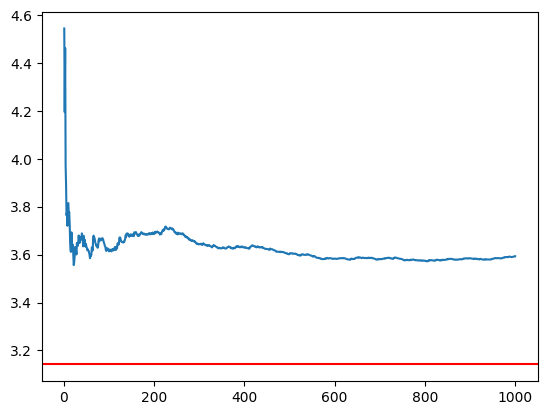

In [189]:
#Estimador con k repeticiones del experimento con N=25 intentos
suma=0
repeticiones=[]
promedios=[]
for i in range(1000):
  intentos=25
  exitos=Funcion_pi_Agujas(intentos)
  Estimador=(2*intentos)/exitos
  suma=suma+Estimador
  promedio=suma/(i+1)
  repeticiones.append(i+1)
  promedios.append(promedio)
plt.plot(repeticiones,promedios)
plt.axhline(np.pi,color="red")